In [2]:
!pip install yfinance # uncomment these to install missing packages if they are not already installed
!pip install pandas

In [3]:
import yfinance as yf
import pandas as pd

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [4]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01'
end_date_test='2024-12-31'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

In [5]:
X_train

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,108.099998,123.874695,89.032242,85.820000,29.495001,7.407407,28.634270,25.775143,31.724295,40.836479
2023-01-04 00:00:00-05:00,113.639999,126.486450,88.049606,85.139999,30.941000,7.570009,29.850695,26.691210,33.455944,41.889061
2023-01-05 00:00:00-05:00,110.339996,126.059433,86.124054,83.120003,30.969999,7.633243,29.590031,26.575495,34.273140,41.701740
2023-01-06 00:00:00-05:00,113.059998,129.118057,87.503708,86.080002,31.555000,7.813911,30.468563,27.703699,35.051399,42.201267
2023-01-09 00:00:00-05:00,119.769997,128.571884,88.138947,87.360001,31.517000,8.717254,30.178938,28.262980,35.771305,42.406425
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,182.580002,496.467255,179.648331,185.570007,66.902000,47.524841,33.608482,30.377298,48.501129,58.291893
2024-06-25 00:00:00-04:00,187.350006,508.100037,184.408096,186.339996,67.240997,49.701897,33.206161,30.546227,47.921867,58.519966
2024-06-26 00:00:00-04:00,196.369995,510.607666,184.199402,193.610001,67.768997,48.897923,33.186535,30.347488,47.303333,58.206371


In [6]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,233.452789
2023-01-04 00:00:00-05:00,223.240829
2023-01-05 00:00:00-05:00,216.624481
2023-01-06 00:00:00-05:00,219.177490
2023-01-09 00:00:00-05:00,221.311462
...,...
2024-06-24 00:00:00-04:00,441.697968
2024-06-25 00:00:00-04:00,444.934204
2024-06-26 00:00:00-04:00,446.128082


# Convert training and testing data into numpy array

In [7]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


# Use linear regression to predict msft stock price from the other stocks' prices

## 1. Append a dummy feature to both X_train and X_test

In [8]:
# Your solution here
train = np.ones((X_train.shape[0], 1)) #number of rows in x_train
test = np.ones((X_test.shape[0], 1)) #number of rows in x_test

X_train = np.hstack((X_train, train)) #arranging matrix x_train
X_test = np.hstack((X_test, test)) #arranging matrix x_test

#verifying correct number of columns and rows
print(X_train.shape)
print(X_test.shape)

(374, 11)
(40, 11)


## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



In [9]:
y_train_flat = y_train.flatten() #Converting the y_train matrix to 374, so removing 1

w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train_flat #( w=(XX′)−1Xy )
print(w.shape) #verifying dimension
print("Weights:", w)#weights

(11,)
Weights: [ 0.17439183  0.26004282  0.34434747  0.2978269   1.95915731 -0.53239927
  2.3330498   0.68483554 -1.90591422  0.51092894 16.40399613]


## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

In [10]:
# Your solution here
y_train_pred = X_train @ w #prediction
y_test_pred  = X_test @ w #prediction


mse_train = np.mean((y_train_pred - y_train.flatten()) ** 2) #MSE = mean((predicted - actual)^2)
mse_test  = np.mean((y_test_pred  - y_test.flatten())  ** 2) #MSE = mean((predicted - actual)^2)

print(f"Train MSE: {mse_train:.3f}")
print(f"Test MSE:  {mse_test:.3f}")

Train MSE: 78.696
Test MSE:  7167.104


2. Using a Neural Networks

In [11]:
#Split the stock price data into training (1/1/2023-6/30/2024), validation (7/1/2024-10/31/2024), and test (11/1/2024-12/31/2024) datasets.
import numpy as np

# Train_set (1/1/2023-6/30/2024)
X_train = get_prices(feature_stocks, start='2023-01-01', end='2024-06-30')
y_train = get_prices([predict_stock], start='2023-01-01', end='2024-06-30')

# Validation_set (7/1/2024-10/31/2024)
X_val = get_prices(feature_stocks, start='2024-07-01', end='2024-10-31')
y_val = get_prices([predict_stock], start='2024-07-01', end='2024-10-31')

# Test_set(11/1/2024-12/31/2024)
X_test = get_prices(feature_stocks, start='2024-11-01', end='2024-12-31')
y_test = get_prices([predict_stock], start='2024-11-01', end='2024-12-31')

print("X_train shape:", X_train.shape)
print("X_val shape:",   X_val.shape)
print("X_test shape:",  X_test.shape)

print("y_train shape:", y_train.shape)
print("y_val shape:",   y_val.shape)
print("y_test shape:",  y_test.shape)

X_train shape: (374, 10)
X_val shape: (86, 10)
X_test shape: (40, 10)
y_train shape: (374, 1)
y_val shape: (86, 1)
y_test shape: (40, 1)


In [12]:
#Estimate the MSFT stock price again with a fully connected neural network with 5 hidden layers. Each hidden layers have 20 neurons. And use ReLU as activation function.
import torch
import torch.nn as nn

#converting data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor   = torch.tensor(X_val.values,   dtype=torch.float32)
y_val_tensor   = torch.tensor(y_val.values,   dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test.values,  dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values,  dtype=torch.float32)

#Neural_Network
class MSFT_Stock_Price(nn.Module):
    def __init__(self):
        super(MSFT_Stock_Price, self).__init__()
        self.fc1 = nn.Linear(10, 20)  #input -> hidden 1
        self.fc2 = nn.Linear(20, 20)  #hidden 1 -> hidden 2
        self.fc3 = nn.Linear(20, 20)  #hidden 2 -> hidden 3
        self.fc4 = nn.Linear(20, 20)  #hidden 3 -> hidden 4
        self.fc5 = nn.Linear(20, 20)  #hidden 4 -> hidden 5
        self.out = nn.Linear(20, 1)   #hidden 5 -> output
        self.relu = nn.ReLU() #activation

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        return self.out(x)

model = MSFT_Stock_Price()
print(model) #just to check structure of the model

MSFT_Stock_Price(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


In [13]:
#Training NN model
# Normalizing the data so all values are on the same scale
X_mean = X_train.mean()  # calculate mean of each stock
X_std  = X_train.std()   # calculate standard deviation of each stock
y_mean = y_train.mean().values[0]  #mean of MSFT prices
y_std  = y_train.std().values[0]   #std of MSFT prices

# Apply normalization and convert to PyTorch tensors again
X_train_t = torch.tensor(((X_train - X_mean) / X_std).values, dtype=torch.float32)
y_train_t = torch.tensor(((y_train - y_mean) / y_std).values, dtype=torch.float32)
X_val_t   = torch.tensor(((X_val   - X_mean) / X_std).values, dtype=torch.float32)
y_val_t   = torch.tensor(((y_val   - y_mean) / y_std).values, dtype=torch.float32)
X_test_t  = torch.tensor(((X_test  - X_mean) / X_std).values, dtype=torch.float32)
y_test_t  = torch.tensor(((y_test  - y_mean) / y_std).values, dtype=torch.float32)

# Recreating model with new weights
model = MSFT_Stock_Price()

#loss function and optimizer
criterion = nn.MSELoss()  #how far predictions are from actual values
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) #updating weights

# Training
epochs = 700
train_losses = []  # store training loss at each epoch
val_losses   = []  # store validation loss at each epoch

for epoch in range(epochs):
    model.train()  # set model to training mode
    y_pred = model(X_train_t)           #making predictions
    loss = criterion(y_pred, y_train_t) #training loss

    optimizer.zero_grad()  # clearing previous gradients
    loss.backward()        # new gradients
    optimizer.step()       # update weights

    #validation
    model.eval()  #evaluation mode
    with torch.no_grad():
        y_val_pred = model(X_val_t)
        val_loss = criterion(y_val_pred, y_val_t)

    #losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    #progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

#final evaluation
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_t)
    test_loss = criterion(y_test_pred, y_test_t)

print(f"\nFinal_Test_MSE: {test_loss.item():.3f}")

#predictions back to dollar price
y_test_pred_actual = y_test_pred.numpy() * y_std + y_mean
y_test_actual      = y_test.values

print(f"\nSample predictions vs actual MSFT prices:")
for i in range(5):
    print(f"Predicted: ${y_test_pred_actual[i][0]:.2f} | Actual: ${y_test_actual[i][0]:.2f}")

Epoch 0 | Train Loss: 1.0192 | Val Loss: 2.3198
Epoch 100 | Train Loss: 1.0102 | Val Loss: 2.2170
Epoch 200 | Train Loss: 1.0050 | Val Loss: 2.1421
Epoch 300 | Train Loss: 1.0019 | Val Loss: 2.0869
Epoch 400 | Train Loss: 0.9999 | Val Loss: 2.0462
Epoch 500 | Train Loss: 0.9985 | Val Loss: 2.0159
Epoch 600 | Train Loss: 0.9975 | Val Loss: 1.9932

Final_Test_MSE: 2.196

Sample predictions vs actual MSFT prices:
Predicted: $339.48 | Actual: $405.63
Predicted: $339.52 | Actual: $403.74
Predicted: $339.48 | Actual: $406.70
Predicted: $339.37 | Actual: $415.32
Predicted: $339.37 | Actual: $420.51


SGD | Final Train Loss: 0.029 | Val Loss: 0.046
Momentum | Final Train Loss: 0.029 | Val Loss: 0.182
Adam | Final Train Loss: 0.002 | Val Loss: 0.182


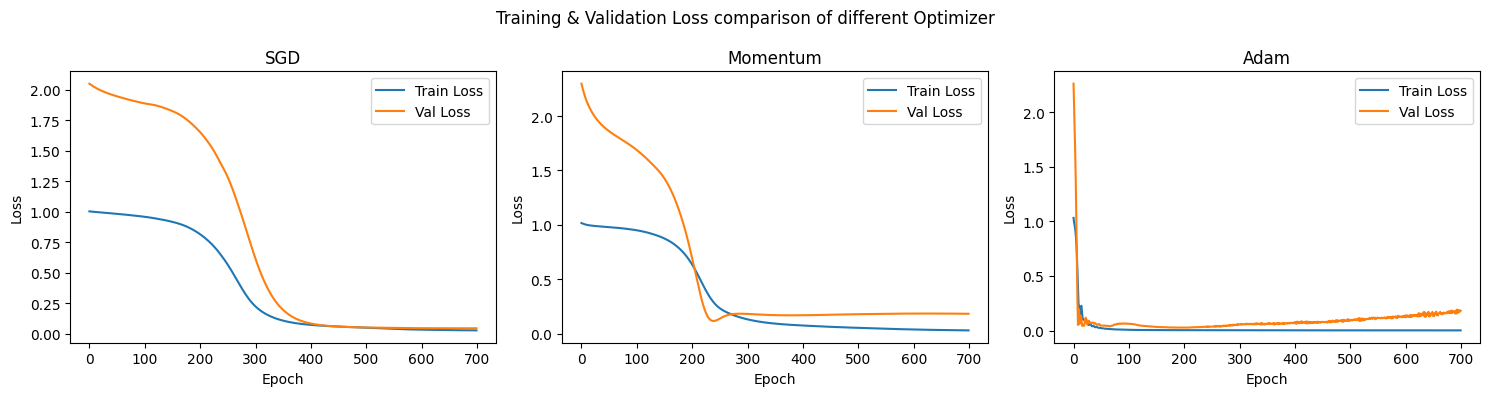

In [14]:
#Try different optimization algorithms, SGD, Momentum, Adam. Plot the training loss/validation loss VS epoch.
import matplotlib.pyplot as plt

#losses for each optimizer
results = {}

#optimizers
optimizers_to_try = {
    'SGD': torch.optim.SGD(MSFT_Stock_Price().parameters(), lr=0.01), #started with 0.0001 and 0.01 seemed to give me a better result
    'Momentum': torch.optim.SGD(MSFT_Stock_Price().parameters(), lr=0.01, momentum=0.09), #I tried 0.9 for momentum but everything seem to be unstable with that.
    'Adam': torch.optim.Adam(MSFT_Stock_Price().parameters(), lr=0.01)
}

epochs = 700

for opt_name, optimizer in optimizers_to_try.items():
    #model for each optimizer
    model = MSFT_Stock_Price()
    optimizer = type(optimizer)(model.parameters(), **optimizer.defaults)

    train_losses = []
    val_losses   = []

    for epoch in range(epochs):
        #training
        model.train()
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #validation
        model.eval()
        with torch.no_grad():
            val_loss = criterion(model(X_val_t), y_val_t)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

    results[opt_name] = {'train': train_losses, 'val': val_losses}
    print(f"{opt_name} | Final Train Loss: {train_losses[-1]:.3f} | Val Loss: {val_losses[-1]:.3f}")

#plotting results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (opt_name, losses) in enumerate(results.items()):
    axes[i].plot(losses['train'], label='Train Loss')
    axes[i].plot(losses['val'],   label='Val Loss')
    axes[i].set_title(f'{opt_name}')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].legend()

plt.suptitle('Training & Validation Loss comparison of different Optimizer')
plt.tight_layout()
plt.show()

OneCycleLR | Final Train Loss: 0.0094 | Val Loss: 0.0464
CyclicLR | Final Train Loss: 0.0109 | Val Loss: 0.0566
ReduceLROnPlateau | Final Train Loss: 0.9850 | Val Loss: 1.8198


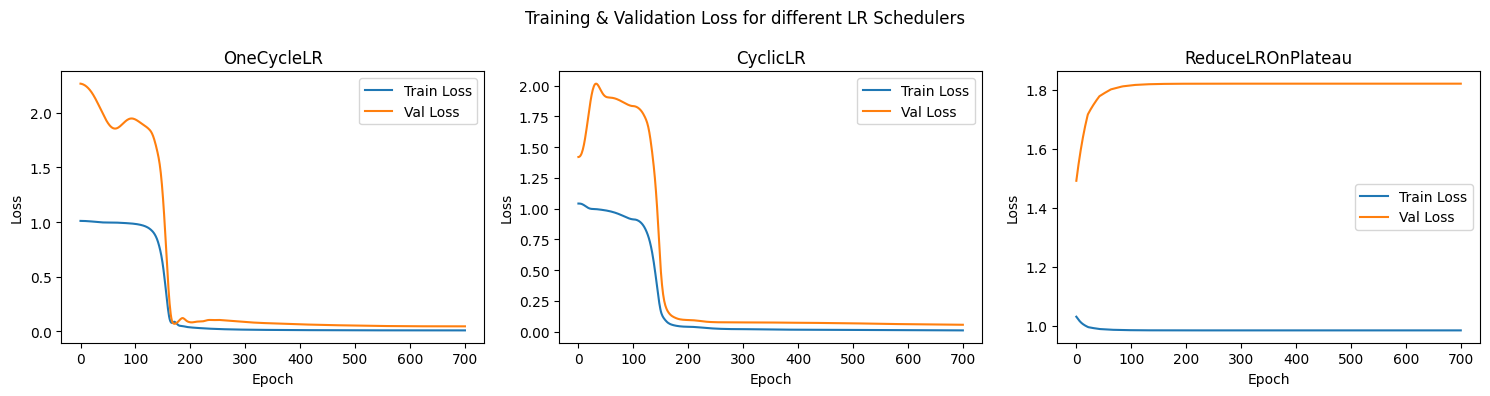

In [15]:
#Set learning rate schedulers using OneCycleLR, CyclicLR, and ReduceLROnPlateau. PyTorch offers learning rate schedulers to change the learning rate over time. Check this tutorial for more instruction. Observe any difference in your training.
import matplotlib.pyplot as plt

epochs = 700
scheduler_results = {}

#3 schedulers
schedulers = ['OneCycleLR', 'CyclicLR', 'ReduceLROnPlateau']

for sched_name in schedulers:
    #model and optimizer for each scheduler
    model = MSFT_Stock_Price()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.09)

    #scheduler
    if sched_name == 'OneCycleLR':
        scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=1, epochs=epochs)
    elif sched_name == 'CyclicLR':
        scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.01, step_size_up=50, mode='triangular')
    elif sched_name == 'ReduceLROnPlateau':
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=20, factor=0.5)

    train_losses = []
    val_losses   = []

    for epoch in range(epochs):
        #training
        model.train()
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # validation
        model.eval()
        with torch.no_grad():
            val_loss = criterion(model(X_val_t), y_val_t)

        # stepping the scheduler
        if sched_name == 'ReduceLROnPlateau':
            scheduler.step(val_loss)
        else:
            scheduler.step()

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

    scheduler_results[sched_name] = {'train': train_losses, 'val': val_losses}
    print(f"{sched_name} | Final Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

#ploting results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (sched_name, losses) in enumerate(scheduler_results.items()):
    axes[i].plot(losses['train'], label='Train Loss')
    axes[i].plot(losses['val'],   label='Val Loss')
    axes[i].set_title(sched_name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].legend()

plt.suptitle('Training & Validation Loss for different LR Schedulers')
plt.tight_layout()
plt.show()

**Model Design Challenge EXTRA CEDIT**

In [19]:
# Checking current model parameters and test MSE targets
import torch
import torch.nn as nn

# Count parameters in current model
total_params = sum(p.numel() for p in model.parameters())
print(f"Current model total parameters: {total_params}")

Current model total parameters: 1921


In [23]:
# Extra Credit_New Model
class Better_Model(nn.Module):
    def __init__(self):
        super(Better_Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 62),   # input -> 62 neurons
            nn.BatchNorm1d(62),  # normalizing layer outputs
            nn.ReLU(), #Activation
            nn.Linear(62, 16),   # 32 -> 16 neurons
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 1)     # 16 -> output
        )

    def forward(self, x):
        return self.model(x)

better_model = Better_Model()
new_params = sum(p.numel() for p in better_model.parameters())
print(f"New model parameters: {new_params}")
print(f"Original model parameters: 1921")

New model parameters: 1863
Original model parameters: 1921


In [29]:
# Normalize data and convert to tensors
X_mean = X_train.mean()
X_std  = X_train.std()
y_mean = y_train.mean().values[0]
y_std  = y_train.std().values[0]

X_train_t = torch.tensor(((X_train - X_mean) / X_std).values, dtype=torch.float32)
y_train_t = torch.tensor(((y_train - y_mean) / y_std).values, dtype=torch.float32)
X_val_t   = torch.tensor(((X_val   - X_mean) / X_std).values, dtype=torch.float32)
y_val_t   = torch.tensor(((y_val   - y_mean) / y_std).values, dtype=torch.float32)
X_test_t  = torch.tensor(((X_test  - X_mean) / X_std).values, dtype=torch.float32)
y_test_t  = torch.tensor(((y_test  - y_mean) / y_std).values, dtype=torch.float32)

#train the better model
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(better_model.parameters(), lr=0.01)

epochs = 1500
train_losses = []
val_losses = []

for epoch in range(epochs):
    better_model.train()
    y_pred = better_model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    better_model.eval()
    with torch.no_grad():
        val_loss = criterion(better_model(X_val_t), y_val_t)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

#evaluation
better_model.eval()
with torch.no_grad():
    y_test_pred = better_model(X_test_t)
    test_loss = criterion(y_test_pred, y_test_t)

print(f"\nFinal Test MSE: {test_loss.item():.4f}")
print(f"Target: 1.0982")

Epoch 0 | Train Loss: 0.0006 | Val Loss: 0.1886
Epoch 200 | Train Loss: 0.0005 | Val Loss: 0.1351
Epoch 400 | Train Loss: 0.0005 | Val Loss: 0.1739
Epoch 600 | Train Loss: 0.0004 | Val Loss: 0.2110
Epoch 800 | Train Loss: 0.0004 | Val Loss: 0.2225
Epoch 1000 | Train Loss: 0.0004 | Val Loss: 0.2276
Epoch 1200 | Train Loss: 0.0003 | Val Loss: 0.2132
Epoch 1400 | Train Loss: 0.0003 | Val Loss: 0.2224

Final Test MSE: 0.5994
Target: 1.0982
